In [ ]:
import pandas as pd
from tabulate import tabulate
import os

In [ ]:
folder_path = 'dataset-ml_eng_task'
df = pd.concat(
    (pd.read_csv(os.path.join(folder_path, f)) for f in os.listdir(folder_path) if f.endswith('.csv')),
    ignore_index=True
)
print(tabulate(df.head(5), headers=df.columns, tablefmt='psql'))


+----+--------------------------------------+------------+----------+---------------+----------------------+-----------------+
|    | product_name                         |   brand_id | locale   |   category_id | category             | product_brand   |
|----+--------------------------------------+------------+----------+---------------+----------------------+-----------------|
|  0 | Funda Tía Golosinas 385 G            |        nan | es_ec    |          4681 | golosinas            | nan             |
|  1 | Flotador Infantil Para Brazo         |        nan | es_ec    |          3949 | flotador             | Bestway         |
|  2 | Canasta Felicidad                    |        nan | es_ec    |          4022 | canasta              | nan             |
|  3 | Alimento Para Perro Cachoro Y Adulto |        nan | es_ec    |           342 | alimento para perros | Buen Can        |
|  4 | Muñeco 35 Cm                         |        nan | es_ec    |          2076 | juegos               | na

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112293 entries, 0 to 112292
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   product_name   112293 non-null  object 
 1   brand_id       49700 non-null   float64
 2   locale         112293 non-null  object 
 3   category_id    112282 non-null  float64
 4   category       112282 non-null  object 
 5   product_brand  85381 non-null   object 
dtypes: float64(2), object(4)
memory usage: 5.1+ MB


In [ ]:
print("\nNumber of NaNs in each column:")
print(df.isna().sum())
print('Shape of df: ', df.shape)


Number of NaNs in each column:
product_name         0
brand_id         62593
locale               0
category_id         11
category            11
product_brand    26912
dtype: int64
Shape of df:  (112293, 6)


In [ ]:
# dropping rows that have null values in product_brand column
df.dropna(inplace=True)
print(df.isna().sum())
print('Shape of df: ', df.shape)

product_name     0
brand_id         0
locale           0
category_id      0
category         0
product_brand    0
dtype: int64
Shape of df:  (49347, 6)


In [ ]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows before: {duplicate_count}")

df.drop_duplicates(inplace=True)

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows after: {duplicate_count}")

Number of duplicate rows before: 4674
Number of duplicate rows after: 0


In [ ]:
df.shape

(44673, 6)


Correlation matrix between textual columns:
                       brand_id  category_id  product_name_encoded  \
brand_id               1.000000    -0.041976              0.011679   
category_id           -0.041976     1.000000             -0.009723   
product_name_encoded   0.011679    -0.009723              1.000000   
locale_encoded         0.126428    -0.306598             -0.023567   
category_encoded       0.035356    -0.110380              0.103584   
product_brand_encoded -0.022326    -0.121837             -0.044222   

                       locale_encoded  category_encoded  product_brand_encoded  
brand_id                     0.126428          0.035356              -0.022326  
category_id                 -0.306598         -0.110380              -0.121837  
product_name_encoded        -0.023567          0.103584              -0.044222  
locale_encoded               1.000000          0.151826               0.014708  
category_encoded             0.151826          1.000000    

/var/folders/9z/1zsbrjl17xj_76sy78736hmr0000gn/T/ipykernel_17265/3067856397.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


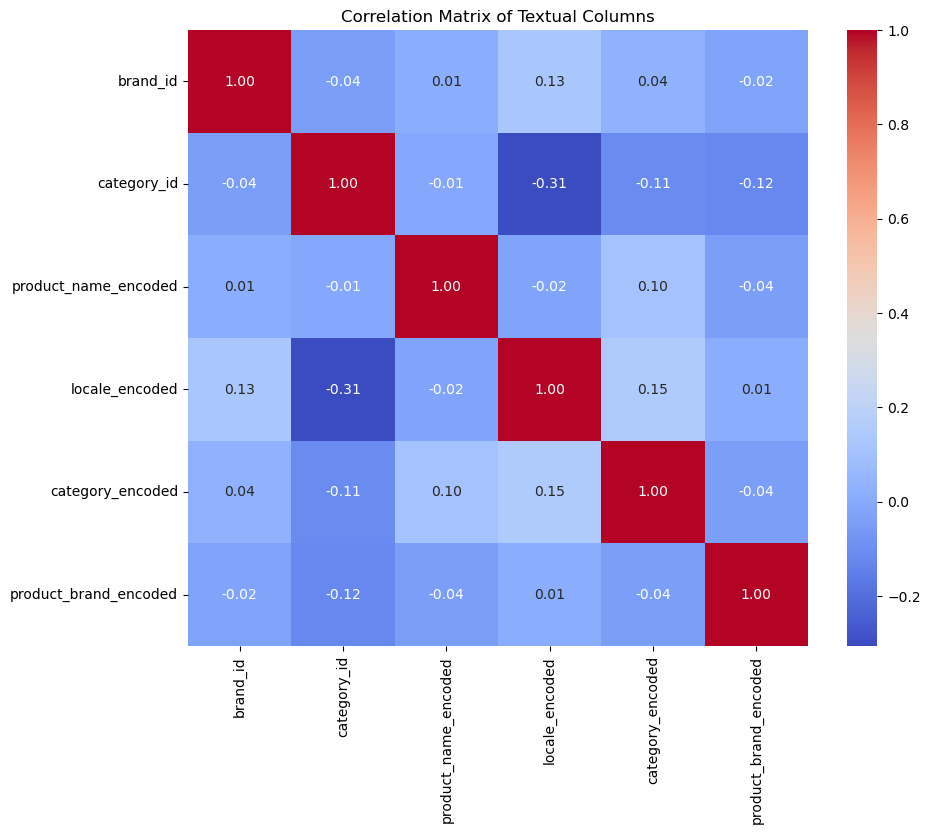

In [ ]:
# Frequency encoding for textual columns
textual_columns = ['product_name', 'locale', 'category', 'product_brand']

for col in textual_columns:
    df[col + '_encoded'] = df[col].map(df[col].value_counts())

# Compute correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("\nCorrelation matrix between textual columns:")
print(correlation_matrix)

# Optional: Plot the correlation matrix using seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Textual Columns')
plt.show()

In [ ]:
# Check if each product_brand has its own unique brand_id
unique_brand_ids = df.groupby('product_brand')['brand_id'].nunique() == 1

# Count the number of product_brands with more than one unique brand_id
non_unique_brand_count = (~unique_brand_ids).sum()

if non_unique_brand_count == 0:
    print("Each product_brand has its own unique brand_id.")
else:
    print(f"There are {non_unique_brand_count} product_brands with more than one unique brand_id.")

# Display a few rows where product_brand has non-unique brand_id for inspection
if non_unique_brand_count > 0:
    print("\nSample rows where product_brand has non-unique brand_id:")
    sample_non_unique = df[df['product_brand'].isin(unique_brand_ids.index)]
    print(sample_non_unique.head())


There are 685 product_brands with more than one unique brand_id.

Sample rows where product_brand has non-unique brand_id:
                                  product_name  brand_id locale  category_id  \
20  Lavadora Semiautomatica Doble Tanque 15 Kg     959.0  es_ec       1175.0   
22                           Café Gold Doypack     837.0  es_ec       1391.0   
45  CELULAR HOT 301 4GB RAM/ 128GB ROM INFINIX     734.0  es_ec        918.0   
70             Adobo Completo La Sazón Doypack    1039.0  es_ec       2819.0   
97                             Lavadoras 17 Kg     755.0  es_ec       1175.0   

     category product_brand  product_name_encoded  locale_encoded  \
20  lavadoras        Innova                     1              19   
22       café       Nescafé                     1              19   
45  celulares          Azul                     1              19   
70      caldo         Maggi                     1              19   
97  lavadoras     Whirlpool                     1  

In [ ]:
# Check if each product_brand has its own unique brand_id
unique_brand_ids = df.groupby('product_name')['product_brand'].nunique() == 1

# Count the number of product_names with more than one unique product_brand
non_unique_brand_count = (~unique_brand_ids).sum()

if non_unique_brand_count == 0:
    print("Each product_brand has its own unique brand_id.")
else:
    print(f"There are {non_unique_brand_count} product_names with more than one unique product_brand.")

# Display a few rows where product_brand has non-unique brand_id for inspection
if non_unique_brand_count > 0:
    print("\nSample rows where product_brand has non-unique brand_id:")
    sample_non_unique = df[df['product_name'].isin(unique_brand_ids.index)]
    print(sample_non_unique.head())


There are 2028 product_names with more than one unique product_brand.

Sample rows where product_brand has non-unique brand_id:
                                  product_name  brand_id locale  category_id  \
20  Lavadora Semiautomatica Doble Tanque 15 Kg     959.0  es_ec       1175.0   
22                           Café Gold Doypack     837.0  es_ec       1391.0   
45  CELULAR HOT 301 4GB RAM/ 128GB ROM INFINIX     734.0  es_ec        918.0   
70             Adobo Completo La Sazón Doypack    1039.0  es_ec       2819.0   
97                             Lavadoras 17 Kg     755.0  es_ec       1175.0   

     category product_brand  product_name_encoded  locale_encoded  \
20  lavadoras        Innova                     1              19   
22       café       Nescafé                     1              19   
45  celulares          Azul                     1              19   
70      caldo         Maggi                     1              19   
97  lavadoras     Whirlpool                   

In [ ]:
df[df['product_name'] == '10kg Front Load Washer']

,product_name,brand_id,locale,category_id,category,product_brand,product_name_encoded,locale_encoded,category_encoded,product_brand_encoded
89746,10kg Front Load Washer,1308.0,en_au,16511.0,Front load washing machine,LG,4,3203,22,275
91461,10kg Front Load Washer,2296.0,en_au,16511.0,Front load washing machine,Electrolux,4,3203,22,13
91494,10kg Front Load Washer,2046.0,en_au,16511.0,Front load washing machine,Hisense,4,3203,22,123
91603,10kg Front Load Washer,1256.0,en_au,16511.0,Front load washing machine,Beko,4,3203,22,65


In [ ]:
df[df['category_id'] == 16511.0]

,product_name,brand_id,locale,category_id,category,product_brand,product_name_encoded,locale_encoded,category_encoded,product_brand_encoded
68730,Panini Per Hamburger,1796.0,it_it,16511.0,Panini,San patrignano,1,8167,2,1
79631,Burger Buns,2564.0,it_it,16511.0,Panini,Daily bread,1,8167,2,5
84244,7.5KG 300 Series Front Load Washer,2310.0,en_au,16511.0,Front load washing machine,Westinghouse,1,3203,22,35
85533,10KG EasyCare Front Load Washer,2310.0,en_au,16511.0,Front load washing machine,Westinghouse,1,3203,22,35
85617,9.5kg Front Load Washing Machine,1810.0,en_au,16511.0,Front load washing machine,Haier,1,3203,22,28
86951,10kg Series 5 Front Load Washing Machine,1308.0,en_au,16511.0,Front load washing machine,LG,1,3203,22,275
87959,9KG Auto Dose Front Load Washer,1256.0,en_au,16511.0,Front load washing machine,Beko,1,3203,22,65
88145,8.5kg Series 5 Front Load Washer,2046.0,en_au,16511.0,Front load washing machine,Hisense,1,3203,22,123
88489,10kg Front Load Washer With Steam Care,1895.0,en_au,16511.0,Front load washing machine,Fisher & Paykel,1,3203,22,12
88613,8KG Series 3 Front Load Washer,1895.0,en_au,16511.0,Front load washing machine,Fisher & Paykel,1,3203,22,12


We can see the `category_id` is unique to product categories, only in particular regions. But since we are considering all the regions and we will remove this data. (Also, as input we only have `product_name` and `product_brand`)

In [ ]:
df = df[['product_name', 'category', 'product_brand']]
df.reset_index(inplace= True, drop = True)
df.head()


,product_name,category,product_brand
0,Lavadora Semiautomatica Doble Tanque 15 Kg,lavadoras,Innova
1,Café Gold Doypack,café,Nescafé
2,CELULAR HOT 301 4GB RAM/ 128GB ROM INFINIX,celulares,Azul
3,Adobo Completo La Sazón Doypack,caldo,Maggi
4,Lavadoras 17 Kg,lavadoras,Whirlpool


In [ ]:
# Check if each product_name is unique to its corresponding product_brand
unique_product_names = df.groupby('product_name')['product_brand'].nunique() == 1

# Count the number of non-unique product names
non_unique_count = (~unique_product_names).sum()

if non_unique_count == 0:
    print("Each product_name is unique to its corresponding product_brand.")
else:
    print(f"There are {non_unique_count} product_names that are not unique to their corresponding product_brand.")

# Display a few rows where product_name is not unique to its corresponding product_brand for inspection
if non_unique_count > 0:
    print("\nSample rows where product_name is not unique to its corresponding product_brand:")
    sample_non_unique = df[df['product_name'].isin(unique_product_names.index)]
    print(sample_non_unique.head())

There are 2028 product_names that are not unique to their corresponding product_brand.

Sample rows where product_name is not unique to its corresponding product_brand:
                                 product_name   category product_brand
0  Lavadora Semiautomatica Doble Tanque 15 Kg  lavadoras        Innova
1                           Café Gold Doypack       café       Nescafé
2  CELULAR HOT 301 4GB RAM/ 128GB ROM INFINIX  celulares          Azul
3             Adobo Completo La Sazón Doypack      caldo         Maggi
4                             Lavadoras 17 Kg  lavadoras     Whirlpool


In [ ]:
# Group by product_name, product_brand, and category and check if each group has more than one unique category
unique_categories = df.groupby(['product_name', 'product_brand', 'category']).size().groupby(['product_name', 'product_brand']).size()

# Find the product names and brands with more than one unique category
multiple_categories = unique_categories[unique_categories > 1]

if multiple_categories.empty:
    print("Each product of each brand has only one category.")
else:
    print("Instances where the same product of the same brand has been assigned different categories:")

    # Iterate over each instance and print details
    for index, count in multiple_categories.items():
        product_name, product_brand = index
        print(f"\nProduct: {product_name}, Brand: {product_brand}, Number of Categories: {count}")

        # Display all rows for the current instance
        instance_rows = df[(df['product_name'] == product_name) & (df['product_brand'] == product_brand)]
        print(instance_rows)



Instances where the same product of the same brand has been assigned different categories:

Product: 1 Litro, Brand: Coca Cola, Number of Categories: 2
      product_name             category product_brand
25331      1 Litro  Bevande analcoliche     Coca Cola
29687      1 Litro               Bibite     Coca Cola

Product: 100 Capsule Caffé Compatibili Nespresso, Brand: Splendid, Number of Categories: 2
                                  product_name       category product_brand
28473  100 Capsule Caffé Compatibili Nespresso  Capsule caffè      Splendid
31234  100 Capsule Caffé Compatibili Nespresso          Caffè      Splendid

Product: 100mg 100 Tablets, Brand: maltofer, Number of Categories: 2
            product_name  category product_brand
32511  100mg 100 Tablets  Medicine      maltofer
34598  100mg 100 Tablets  Pharmacy      maltofer

Product: 15 Bastoncini Di Merluzzo, Brand: Frosta, Number of Categories: 2
                    product_name  category product_brand
29002  15 Baston

We can see there are items under same brand and same product under different categories. We will handle this soon, lets get insights into the categories.

In [ ]:
multiple_categories

product_name                             product_brand
1 Litro                                  Coca Cola        2
100 Capsule Caffé Compatibili Nespresso  Splendid         2
100mg 100 Tablets                        maltofer         2
15 Bastoncini Di Merluzzo                Frosta           2
175 G                                    Jocca            2
                                                         ..
Água Mineral Classic                     Carrefour        2
Água Sanitária                           Carrefour        2
Álcool líquido Essential                 Carrefour        2
Óleo Composto                            Faisão           2
Œufs De Poules Élevées En Plein Air Bio  Carrefour        2
Length: 967, dtype: int64

Lets try to fix this issue by creating common catergories for items with same brand and product. We also make sure the product brand itself is not the category (as we saw in case of Coca-Cola products, where the category itself was assigned to "Coca Cola")

In [ ]:
# lets print rows where product_name = Refresco Regular    and product_brand = Pepsi
df[(df['product_name'] == 'Refresco Regular') & (df['product_brand'] == 'Pepsi')]


,product_name,category,product_brand
35178,Refresco Regular,Pepsi,Pepsi
35456,Refresco Regular,bebidas,Pepsi
35646,Refresco Regular,refrescos,Pepsi


In [ ]:
df[(df['product_brand'] == 'Pepsi')]

,product_name,category,product_brand
16,Licor Don Castelo,bebidas,Pepsi
56,"Zéro Sucres ""maxi Format""",Pepsi Zéro,Pepsi
455,Zéro,Pepsi Zéro,Pepsi
1299,Zero Sucres,Pepsi Zéro,Pepsi
3738,Zero Sucre,Pepsi Zéro,Pepsi
5069,Soda <<format Familial>>,Pepsi Zéro,Pepsi
5652,Zéro Sucres Format Familial,boissons,Pepsi
5733,Concentré Ou 7up Sodastream,Pepsi,Pepsi
6778,Sur La Gamme Zéro Sucres,Pepsi Zéro,Pepsi
24073,Cola Regular,Pepsi cola,Pepsi


Lets print the total number of brands we have

In [ ]:
# total unique brand names in df
len(df['product_brand'].unique())

6725

Lets look at the top 50 brands

In [ ]:
# top 50 brands and their row counts
df['product_brand'].value_counts().head(50)


Carrefour        1206
eroski            716
Nestlé            480
Samsung           442
Dia               397
carrefour         309
LG                275
Purina            208
Danone            198
Colgate           181
Nivea             171
Findus            166
Lindt             158
Aro               145
Selex             142
Philips           139
Auchan            137
Bonduelle         132
Bosch             132
Puleva            131
HP                131
Ariel             130
Pescanova         129
Président         127
Milka             124
Hisense           123
Gillette          117
Finish            113
Porsi             113
Coca-Cola         112
Nescafé           112
Spar              112
Mulino Bianco     109
TEX               107
Gallo             107
Parkside          105
Barilla           105
Lenovo            103
Garnier           102
Cora              101
Kinder            100
Pampers            98
Kellogg's          98
Knorr              97
Sony               97
Huggies   

top 50 categories

In [ ]:
# top 50 categories and their row counts
df['category'].value_counts().head(50)


cerveza                    405
queso                      385
bebidas                    295
galletas                   286
vino                       277
detergente líquido         242
chocolate                  225
Pharmacy                   225
café                       220
Vitamins                   207
leche                      200
Vino                       195
yogur                      187
snacks                     186
comida para gatos          177
detergente                 171
vino tinto                 169
fromage                    168
juegos                     163
desodorante                159
jamón                      153
refrescos                  149
whisky                     149
detergente lavavajillas    140
papel higiénico            139
pizza                      132
Formaggio                  131
Beer                       128
cereales                   128
pañales                    125
Biscotti                   122
comida para perros         121
cerveja 

In [ ]:
# lets try to remove rows where brand name is same as category
print("Before rmoving: ", df.shape)
df = df[df['product_brand']!= df['category']]
print("After removing categories having brand names: ", df.shape)
df = df[df['product_name']!= df['category']]
print("After removing categories having product name: ", df.shape)

Before rmoving:  (44673, 3)
After removing categories having brand names:  (44435, 3)
After removing categories having product name:  (43874, 3)


In [ ]:
df[(df['product_brand'] == 'Pepsi')]

,product_name,category,product_brand
16,Licor Don Castelo,bebidas,Pepsi
56,"Zéro Sucres ""maxi Format""",Pepsi Zéro,Pepsi
455,Zéro,Pepsi Zéro,Pepsi
1299,Zero Sucres,Pepsi Zéro,Pepsi
3738,Zero Sucre,Pepsi Zéro,Pepsi
5069,Soda <<format Familial>>,Pepsi Zéro,Pepsi
5652,Zéro Sucres Format Familial,boissons,Pepsi
6778,Sur La Gamme Zéro Sucres,Pepsi Zéro,Pepsi
24073,Cola Regular,Pepsi cola,Pepsi
25298,Cola Regular,Bevande analcoliche,Pepsi


In [ ]:
!pip install pandas matplotlib wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


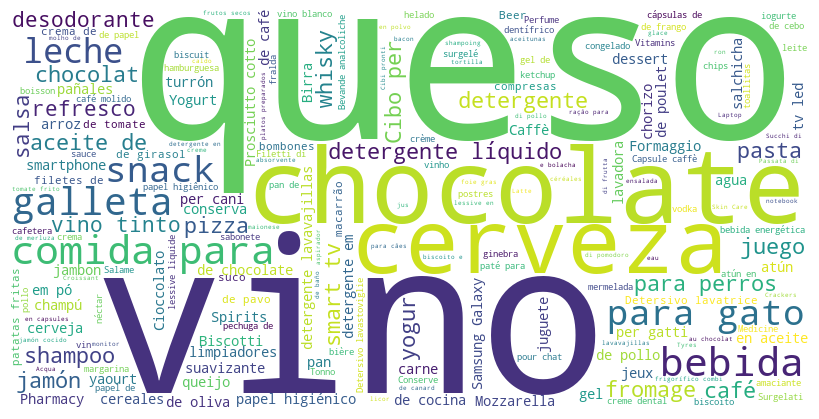

In [ ]:
text = " ".join(df["category"].astype(str))
wordcloud = WordCloud(
    width=800, height=400,
    background_color="white",
    #stopwords=stopwords,
    min_font_size=1
).generate(text)

# Display the generated image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# numbers of unique categories in column
len(df['category'].unique())

6234

# begining individual

File Name:  es_ec.csv
1. Shape of the combined dataframe: (210, 6)

2. Number of NaNs per column:
product_name       0
brand_id         191
locale             0
category_id        0
category           0
product_brand     63
dtype: int64

3. Number of unique values per column (excluding NaNs):
product_name     206
brand_id          14
locale             1
category_id      136
category         141
product_brand    116
dtype: int64

4. Inconsistent categories for the same product name and brand:
Series([], Name: category, dtype: int64)

5. Top 20 Categories Plot:


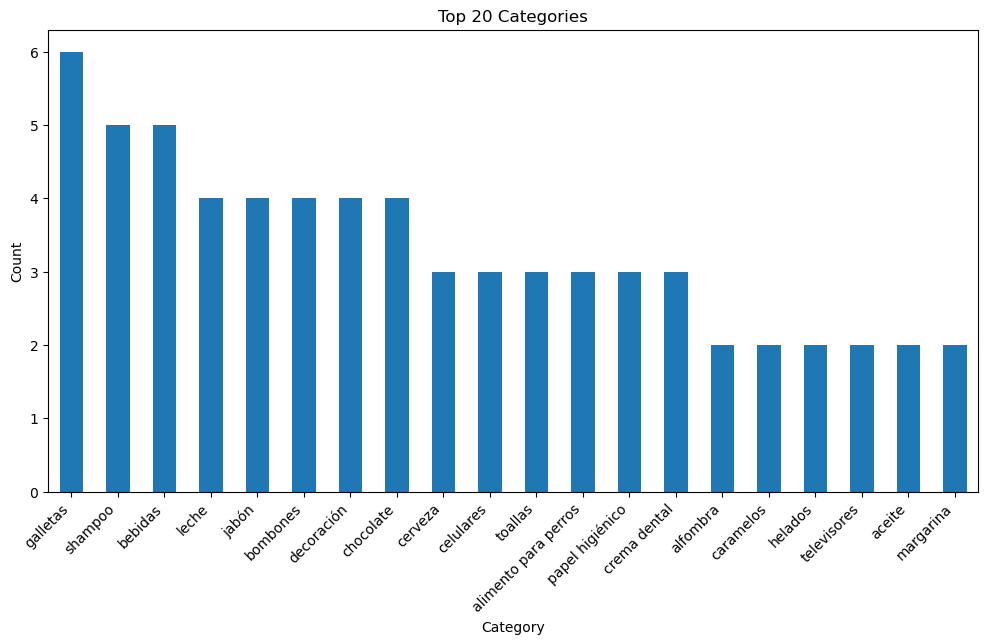

File Name:  fr_fr.csv
1. Shape of the combined dataframe: (23974, 6)

2. Number of NaNs per column:
product_name         0
brand_id         16361
locale               0
category_id          0
category             0
product_brand     7576
dtype: int64

3. Number of unique values per column (excluding NaNs):
product_name     20942
brand_id           573
locale               1
category_id       2493
category          2898
product_brand     4965
dtype: int64

4. Inconsistent categories for the same product name and brand:
product_name                             product_brand
Allumettes                               Auchan           2
                                         Carrefour        2
Allumettes Classic'                      Carrefour        2
Amandes En Poudre                        Vahiné           2
Appareil A Fondue                        Tristar          2
                                                         ..
Yaourt Aux Probiotiques Aux Fruits       Activia          2
Y

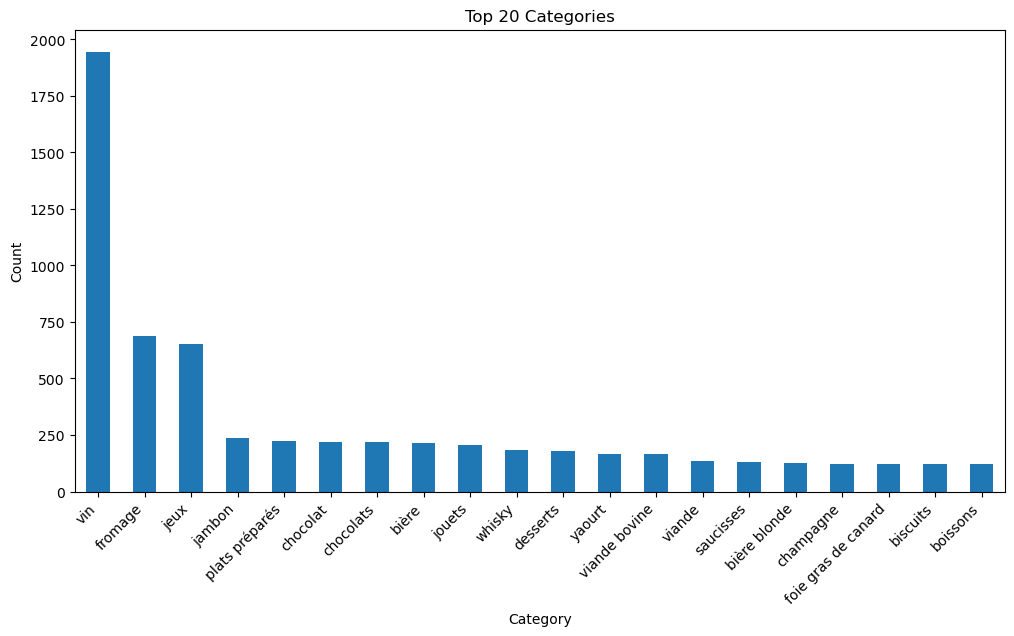

File Name:  es_es.csv
1. Shape of the combined dataframe: (29849, 6)

2. Number of NaNs per column:
product_name         0
brand_id         12006
locale               0
category_id          1
category             1
product_brand     6265
dtype: int64

3. Number of unique values per column (excluding NaNs):
product_name     25077
brand_id          1794
locale               1
category_id       3163
category          3734
product_brand     4854
dtype: int64

4. Inconsistent categories for the same product name and brand:
product_name                    product_brand            
50% Iberian Cured Ham Shoulder  eroski                       2
Abatible Madera Suelo Natural   Pikolin                      2
Aceite De Girasol               koipesol                     2
Aceite De Oliva Virgen          Carbonell                    2
Aceite De Oliva Virgen Extra    Carbonell                    3
                                                            ..
leche sin lactosa               Central 

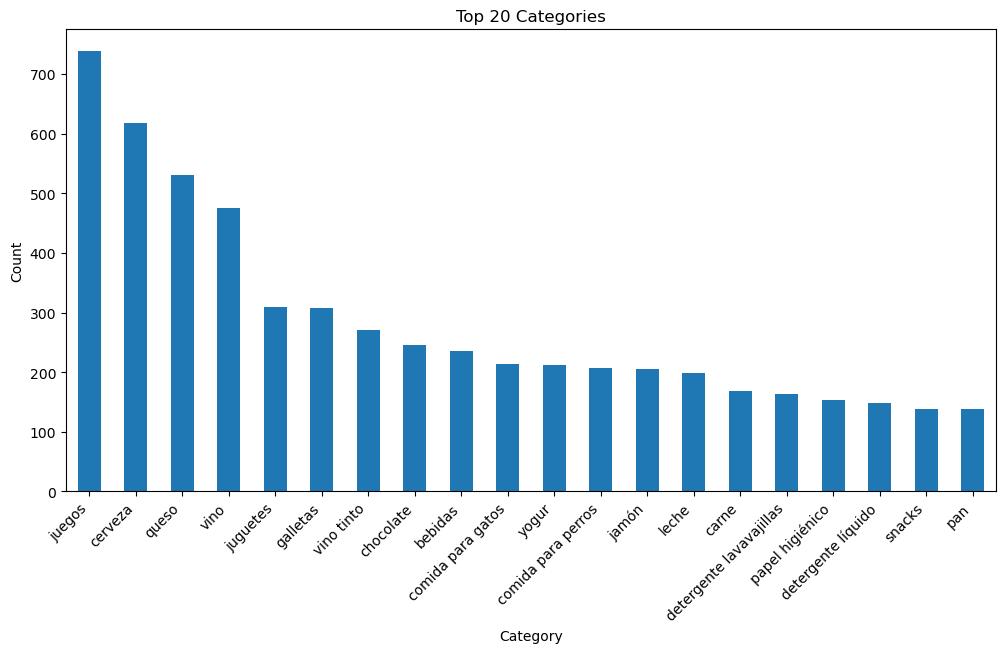

File Name:  it_it.csv
1. Shape of the combined dataframe: (29974, 6)

2. Number of NaNs per column:
product_name         0
brand_id         20392
locale               0
category_id          0
category             0
product_brand     4330
dtype: int64

3. Number of unique values per column (excluding NaNs):
product_name     21867
brand_id          1461
locale               1
category_id        988
category          1168
product_brand     5498
dtype: int64

4. Inconsistent categories for the same product name and brand:
product_name                             product_brand
1 Litro                                  Coca Cola        2
100 Capsule Caffé Compatibili Nespresso  Splendid         2
11 5G                                    Realme           2
15 Bastoncini Di Merluzzo                Frosta           3
175 G                                    Jocca            2
                                                         ..
Wafer Tortina                            Loacker          2
W

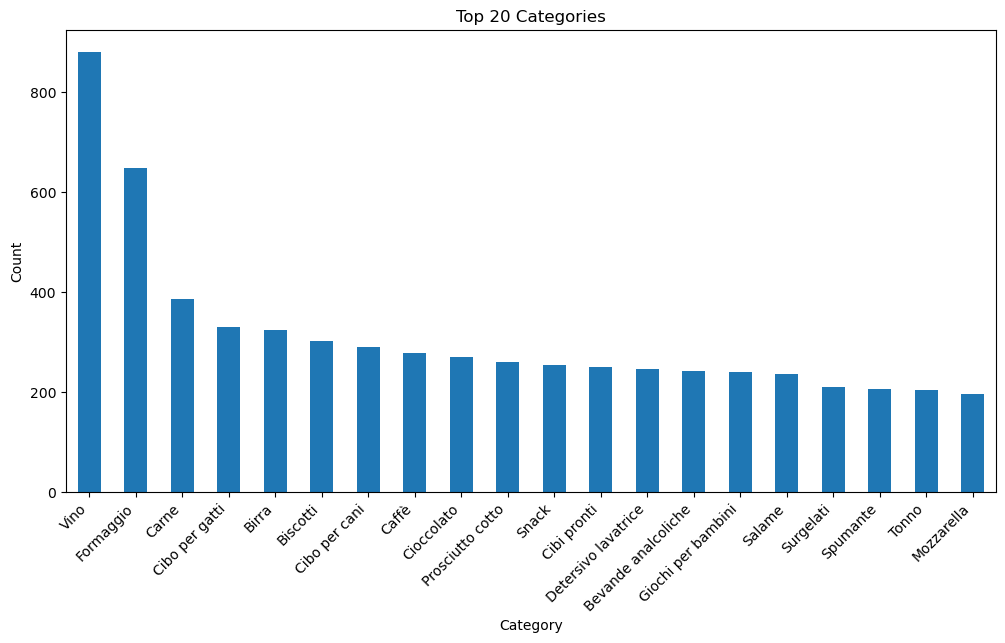

File Name:  en_au.csv
1. Shape of the combined dataframe: (10094, 6)

2. Number of NaNs per column:
product_name        0
brand_id         6533
locale              0
category_id         4
category            4
product_brand    5336
dtype: int64

3. Number of unique values per column (excluding NaNs):
product_name     9247
brand_id          714
locale              1
category_id       693
category          757
product_brand    1605
dtype: int64

4. Inconsistent categories for the same product name and brand:
product_name                                            product_brand        
100mg 100 Tablets                                       maltofer                 2
30 Tablets                                              maltofer                 2
54cm Freestanding Cooker                                Westinghouse             2
55" QLED UHD Android 11 TV with Edgeless Metal Frame    Jvc                      2
60cm Induction Cooktop                                  Westinghouse          

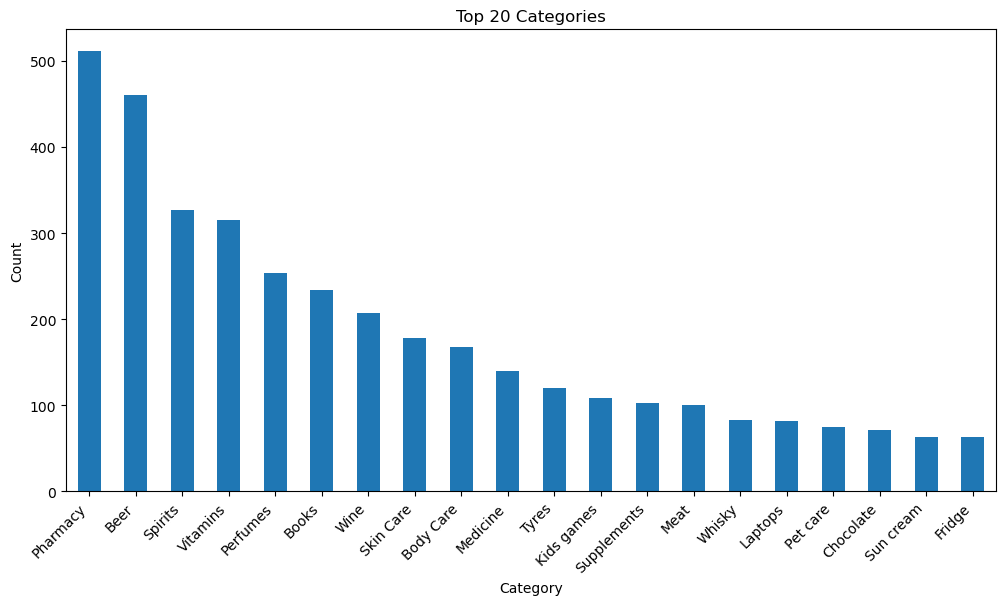

File Name:  en_nz.csv
1. Shape of the combined dataframe: (17, 6)

2. Number of NaNs per column:
product_name      0
brand_id         17
locale            0
category_id       0
category          0
product_brand    17
dtype: int64

3. Number of unique values per column (excluding NaNs):
product_name     16
brand_id          0
locale            1
category_id       4
category          4
product_brand     0
dtype: int64

4. Inconsistent categories for the same product name and brand:
Series([], Name: category, dtype: int64)

5. Top 20 Categories Plot:


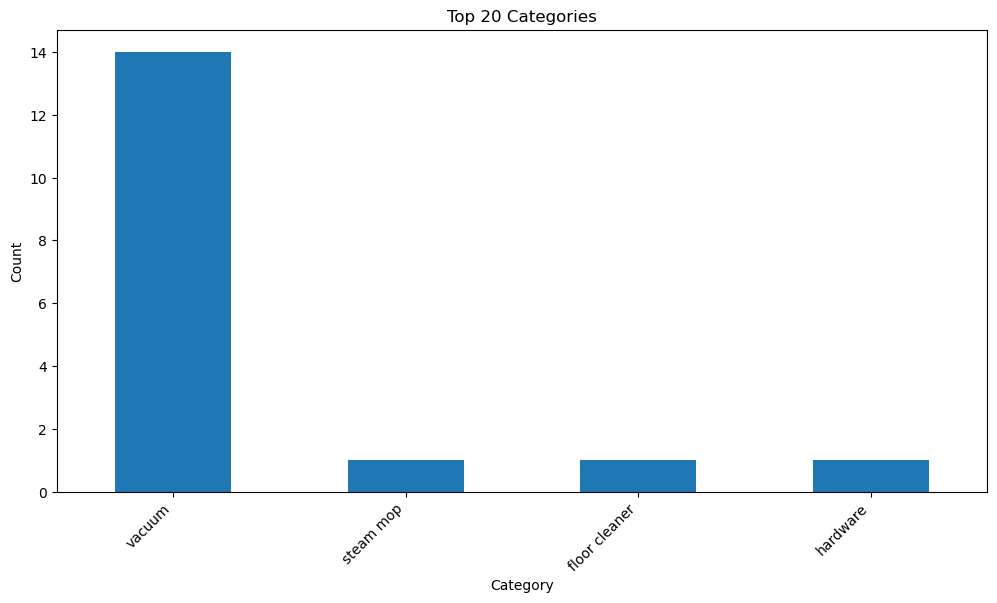

File Name:  es_mx.csv
1. Shape of the combined dataframe: (2544, 6)

2. Number of NaNs per column:
product_name        0
brand_id         1348
locale              0
category_id         0
category            0
product_brand     643
dtype: int64

3. Number of unique values per column (excluding NaNs):
product_name     2267
brand_id          469
locale              1
category_id       700
category          735
product_brand     979
dtype: int64

4. Inconsistent categories for the same product name and brand:
product_name                                 product_brand
Alimento Lacteo Kinder                       Nido             2
Blanqueador                                  Cloralex         2
Calentador Plenus 07 Lp                      Calorex          2
Cerveza Light                                Coors            2
Columpio Para Exterior                       Fagus            2
Crema                                        Norteñita        2
Detergente Lavatrastes Desinfectante         C

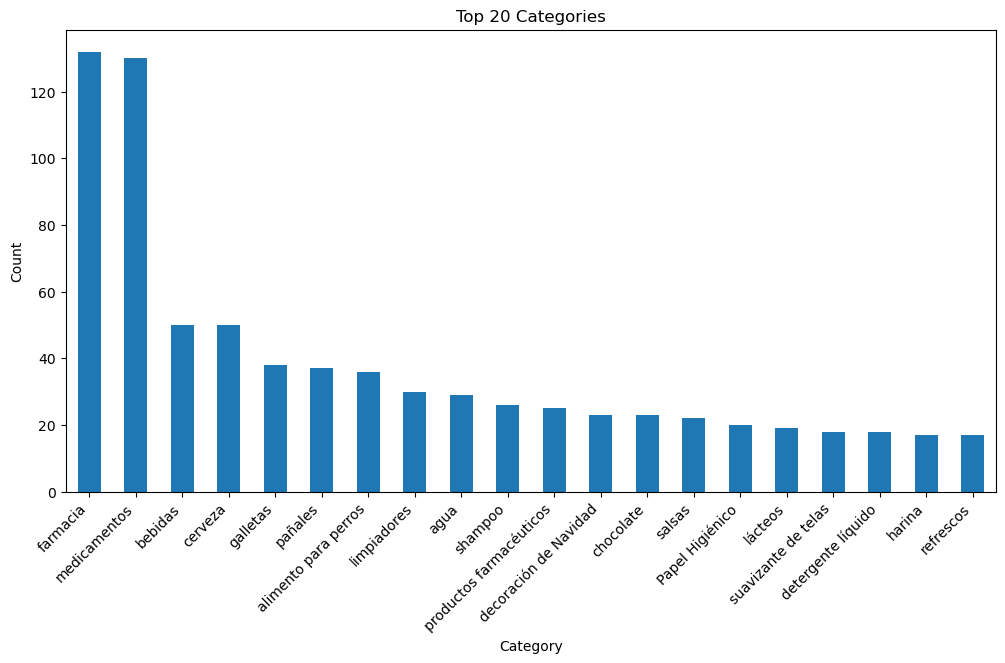

File Name:  pt_br.csv
1. Shape of the combined dataframe: (9231, 6)

2. Number of NaNs per column:
product_name        0
brand_id         2819
locale              0
category_id         3
category            3
product_brand    1161
dtype: int64

3. Number of unique values per column (excluding NaNs):
product_name     5710
brand_id         1056
locale              1
category_id       967
category          988
product_brand    1887
dtype: int64

4. Inconsistent categories for the same product name and brand:
product_name                   product_brand
Achocolatado Em Pó Chocolatto  3 Corações       2
Agua Mineral                   Milagre          2
Agua Mineral Classic           Carrefour        2
Agua Mineral Vitta             Crystal          2
Alcatra Bovina                 bovina           2
                                               ..
Água Mineral                   Indaiá           2
Água Mineral Classic           Carrefour        2
Água Sanitária                 Carrefour    

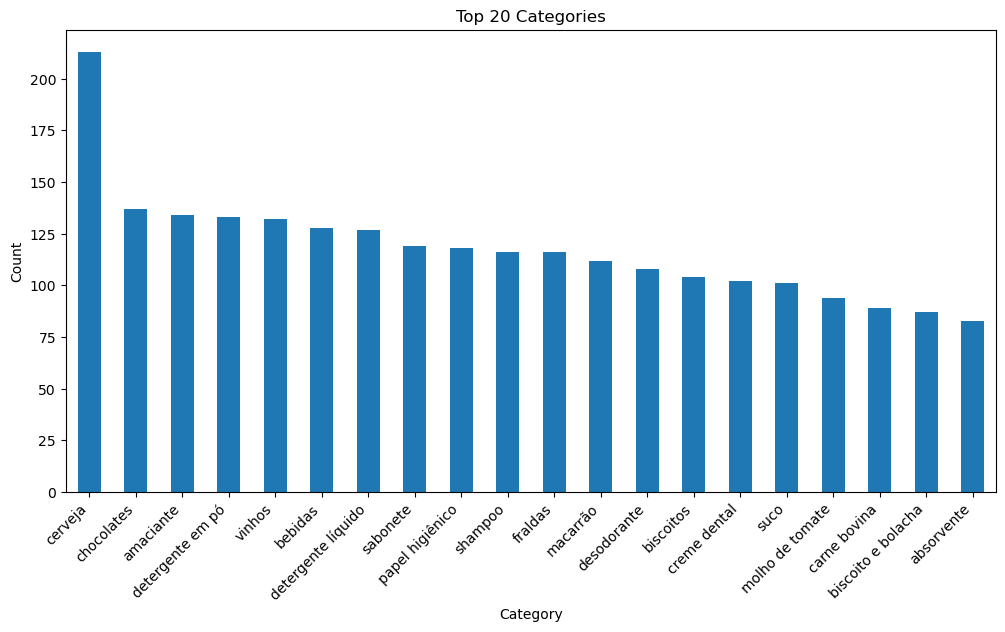

File Name:  en_za.csv
1. Shape of the combined dataframe: (328, 6)

2. Number of NaNs per column:
product_name       0
brand_id         181
locale             0
category_id        1
category           1
product_brand    113
dtype: int64

3. Number of unique values per column (excluding NaNs):
product_name     326
brand_id          72
locale             1
category_id      233
category         239
product_brand    123
dtype: int64

4. Inconsistent categories for the same product name and brand:
Series([], Name: category, dtype: int64)

5. Top 20 Categories Plot:


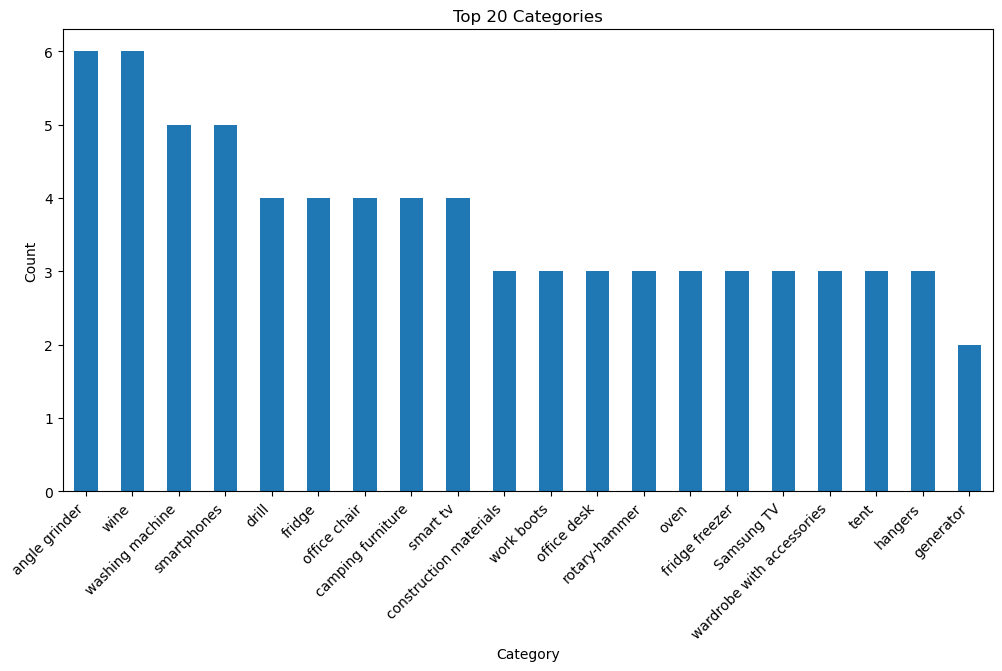

File Name:  es_co.csv
1. Shape of the combined dataframe: (2133, 6)

2. Number of NaNs per column:
product_name       0
brand_id         729
locale             0
category_id        0
category           0
product_brand    354
dtype: int64

3. Number of unique values per column (excluding NaNs):
product_name     1974
brand_id          417
locale              1
category_id       597
category          619
product_brand     686
dtype: int64

4. Inconsistent categories for the same product name and brand:
product_name                                              product_brand
Aceite Clima Calido                                       Country Ranch    2
Aceite De Girasol                                         Cuisine & Co     2
Aceite Vegetal                                            Puroil           3
Alimento Para Perros                                      Dogourmet        2
Arroz                                                     Don Perfecto     2
Arroz Premium                         

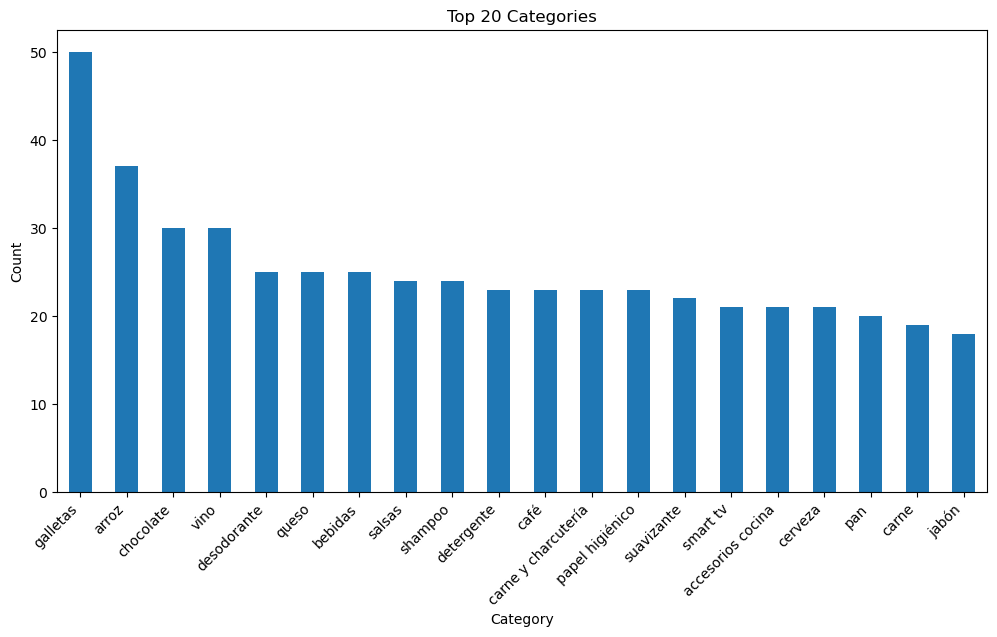

File Name:  es_ar.csv
1. Shape of the combined dataframe: (1322, 6)

2. Number of NaNs per column:
product_name       0
brand_id         624
locale             0
category_id        0
category           0
product_brand    373
dtype: int64

3. Number of unique values per column (excluding NaNs):
product_name     1216
brand_id          301
locale              1
category_id       491
category          501
product_brand     444
dtype: int64

4. Inconsistent categories for the same product name and brand:
product_name                 product_brand
Aceite Mezcla                Siglo de Oro     2
Agua Mineral Sin Gas         Check            2
Celular 408 Gris             TCL              2
Chips De Banana              Check            2
Colchon Inflable 2 Plazas    Bestway          2
Energizante                  Speed            2
Espumante Extra Brut         Emilia           2
Filete De Merluza Congelado  Epuyen           2
Papas Noisette               Check            2
Queso Cremoso Horma 

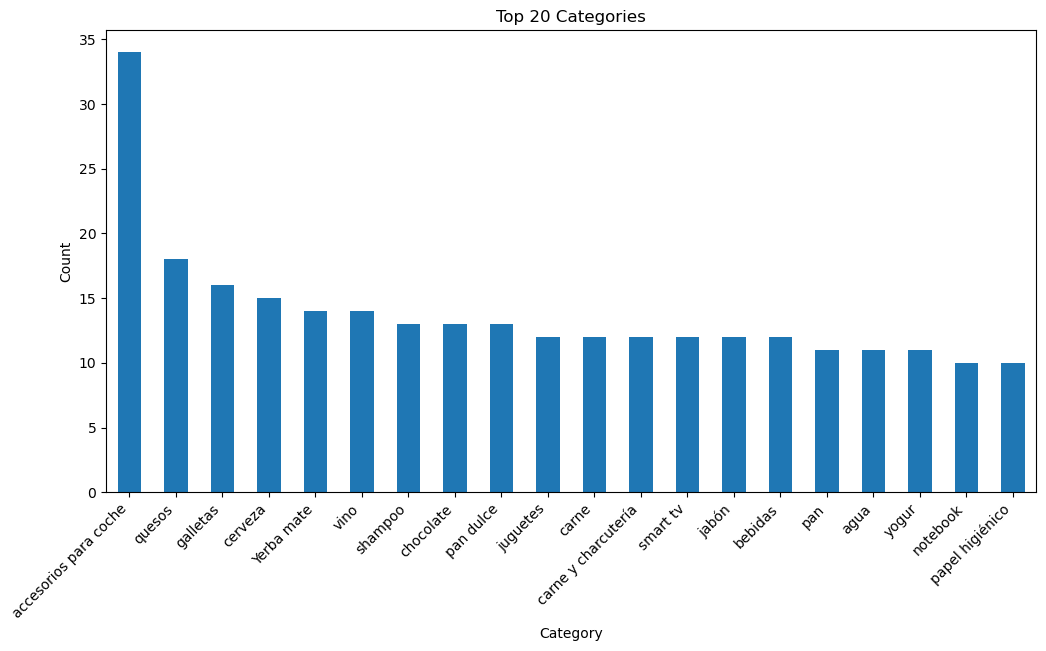

File Name:  es_cl.csv
1. Shape of the combined dataframe: (9, 6)

2. Number of NaNs per column:
product_name     0
brand_id         0
locale           0
category_id      0
category         0
product_brand    0
dtype: int64

3. Number of unique values per column (excluding NaNs):
product_name     9
brand_id         1
locale           1
category_id      2
category         2
product_brand    1
dtype: int64

4. Inconsistent categories for the same product name and brand:
Series([], Name: category, dtype: int64)

5. Top 20 Categories Plot:


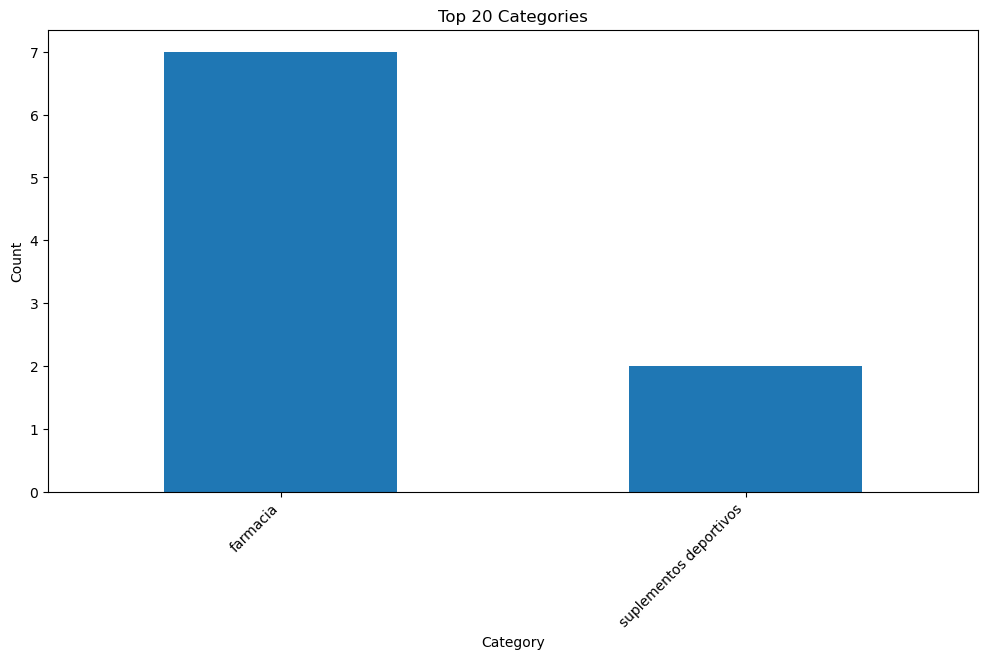

File Name:  pt_pt.csv
1. Shape of the combined dataframe: (2608, 6)

2. Number of NaNs per column:
product_name        0
brand_id         1392
locale              0
category_id         2
category            2
product_brand     681
dtype: int64

3. Number of unique values per column (excluding NaNs):
product_name     2312
brand_id          356
locale              1
category_id       806
category          840
product_brand     858
dtype: int64

4. Inconsistent categories for the same product name and brand:
product_name            product_brand
Alimento Humido P/ Cao  Porsi            2
Alimento Seco P/ Gato   Friskies         2
Boneco Bebé             One Two Fun      2
Camisola                Inextenso        2
Fiambre Perna Extra     Nobre            2
Gresso                  Gresso           2
Iced Tea                Auchan           2
Limpa Vidros            Auchan           2
Oleo Alimentar          Fula             2
Porsi                   Porsi            2
Pão De Forma         

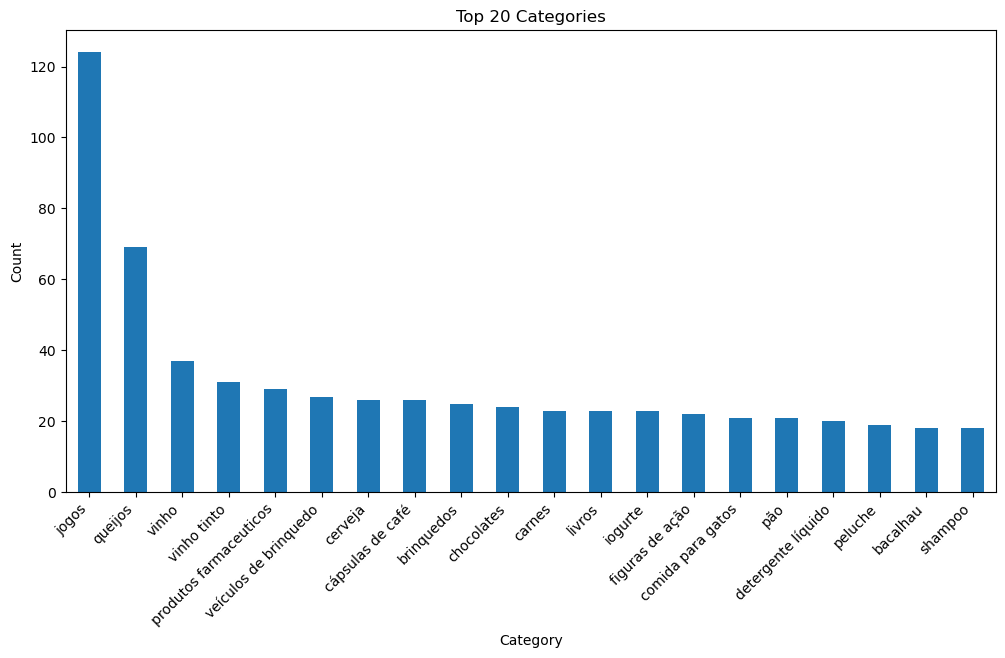

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def analyze_product_data(folder_path):
    """Analyzes CSV files in the given folder and provides product insights."""

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            # Analysis and Output
            print("File Name: ", file_name)
            print("1. Shape of the combined dataframe:", df.shape)

            # NaN Counts
            print("\n2. Number of NaNs per column:")
            print(df.isnull().sum())

            # Unique Values (excluding NaNs)
            print("\n3. Number of unique values per column (excluding NaNs):")
            print(df.nunique())

            # Category Consistency Check
            print("\n4. Inconsistent categories for the same product name and brand:")
            category_check = df.groupby(["product_name", "product_brand"])["category"].nunique()
            inconsistent_categories = category_check[category_check > 1]
            print(inconsistent_categories)

            # Top 20 Categories Plot
            print("\n5. Top 20 Categories Plot:")
            top_categories = df["category"].value_counts().head(20)
            plt.figure(figsize=(12, 6))
            top_categories.plot(kind="bar")
            plt.xlabel("Category")
            plt.ylabel("Count")
            plt.title("Top 20 Categories")
            plt.xticks(rotation=45, ha="right")  # Rotate x-labels for readability
            plt.show()



# Get folder path from the user (you can modify this)
folder_path = '/Users/wenda/Documents/GITHUB/Modelling/dataset-ml_eng_task'

# Ensure the provided path is valid
if os.path.isdir(folder_path):
    analyze_product_data(folder_path)
else:
    print("The provided folder path is invalid. Please check the path and try again.")


In [ ]:
unique_categories = df["category"].unique()
list(unique_categories)

['lavadoras',
 'café',
 'celulares',
 'caldo',
 'helados',
 'té',
 'impresoras',
 'leche en polvo',
 'condimentos',
 'refrigeradoras',
 'papel higiénico',
 'telefonía',
 'cocina a gas',
 'televisores',
 'bebidas',
 "tv led 65'",
 'parlantes',
 'lave-vaisselle',
 'biscuits au chocolat',
 'yaourt aux fruits',
 'couches',
 'friteuse',
 'chocolats',
 'beignets',
 'boîte à mouchoirs',
 'desserts',
 'eau',
 'rafraîchissements',
 'vin',
 'poêle',
 'Kiwis',
 'choucroute',
 'jeux',
 'ordinateur portable',
 'collants',
 'snacks',
 'pommes de terre',
 'Coca-cola',
 'sauce pesto',
 'steak haché',
 'plateau',
 'biscottes',
 'rhum blanc',
 'feuilletée',
 'salade',
 'fromage',
 'beurre',
 'lait demi-écrémé',
 'saucisses',
 'pâtisserie',
 'alimentation',
 'yaourt liquide',
 'lessive en capsules',
 'Pepsi Zéro',
 'jus',
 'lait',
 'jambon',
 'bière blonde',
 'haricots verts',
 'saumon fumé',
 'ustensiles de cuisine',
 'limonade',
 'accessoires pour cuisiner',
 'poitrine de canard',
 'biscuits',
 'bouché